In [44]:
# LOD determination for LC-ICPMS method 

from matplotlib.backends.backend_pdf import PdfPages

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import os
from tempfile import tempdir
from time import time
from turtle import color
from unittest.mock import NonCallableMagicMock
import pandas as pd
import numpy as np
import warnings
import math
import re

import seaborn as sns
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path
import matplotlib.pyplot as plt
from copy import copy 


dir = '/Users/christiandewey/Library/CloudStorage/GoogleDrive-christian.w.dewey@gmail.com/My Drive/manuscripts/2023_Dewey-Boiteau-etal_LCICPMS/data/LOD/zdv_LOD/lod'

flist=os.listdir(dir)
os.chdir(dir)

print(flist)

['cwd_230127_zdv_0p05ppb_50uL_13.csv', 'cwd_230127_zdv_2p5ppb_50uL_34.csv', 'cwd_230127_zdv_2p5ppb_50uL_35.csv', 'cwd_230127_zdv_2p5ppb_50uL_36.csv', 'cwd_230127_zdv_0p05ppb_50uL_15.csv', 'cwd_230127_zdv_2p5ppb_50uL_32.csv', 'cwd_230127_zdv_2p5ppb_50uL_33.csv', 'cwd_230127_zdv_0p05ppb_50uL_14.csv', 'cwd_230127_zdv_0p05ppb_50uL_16.csv', 'cwd_230127_zdv_2p5ppb_50uL_31.csv', 'cwd_230127_zdv_2p5ppb_50uL_30.csv', 'cwd_230127_zdv_0p05ppb_50uL_17.csv', 'cwd_230127_zdv_2p5ppb_50uL_29.csv', 'cwd_230127_zdv_0p05ppb_50uL_19.csv', 'cwd_230127_zdv_0p05ppb_50uL_18.csv', 'cwd_230127_zdv_0p05ppb_50uL_20.csv']


In [45]:

def getPeakArea(df):

    cnames = df.columns.values.tolist()

    metal = cnames[1]

    t = cnames[0]

    summed_area = 0
    timeDelta = 0
    totalTime = 0
    me_col_ind = 1 # = df.columns.get_loc(metal)
    for i in range(len(df)-1):

        icp_1 = df.iloc[i,me_col_ind] # cps
        icp_2 = df.iloc[i+1,me_col_ind] 
        min_height = min([icp_1,icp_2])
        max_height = max([icp_1,icp_2])
        
        timeDelta = (df.iloc[i+1,me_col_ind - 1] - df.iloc[i,me_col_ind - 1]) # minutes; time is always to left of metal signal

        
        rect_area = timeDelta * min_height
        top_area = timeDelta * (max_height - min_height) * 0.5
        An = rect_area + top_area

        summed_area = summed_area + An  # area =  cps * sec = counts
        totalTime = totalTime + timeDelta
    return summed_area

In [ ]:
metals = ['55Mn', '59Co','60Ni','66Zn','111Cd','63Cu', '56Fe']


for f in flist:
    fig, ax = plt.subplots()
    df = pd.read_csv(f,sep=';',header=1)


    maxicp = 0 
    for me in metals:

        me_key = 'Time %s' %me

        x = df[me_key]/60
        
        inds = np.asarray(x>=0.65)
        x_sub = x[inds]

        y = df[me]
        
        y_sub = y[inds]
            
        x_sub = np.asarray(x_sub).reshape((-1, 1))

        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(x_sub, y_sub)

        # Make predictions using the testing set
        pred = regr.predict(x_sub)
        rmse=np.sqrt(mean_squared_error(y_sub, pred))
        # The mean squared error
        print(me)
        print("Root mean squared error: %.2f" % rmse)
        # The coefficient of determination: 1 is perfect prediction
        print("3 X RMSE: %.2f" % (3*rmse))


        z = y_sub - pred
        dx = x_sub[1:] - x_sub[:-1]

        z = np.array(z)

        cross = np.sign(np.multiply(z[:-1], z[1:]))

        indx = np.where(cross==-1)
        print(indx)

        print(np.shape(indx))
        x_intersect = x_sub[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]


        #ax.plot(icpms[me_key]/60, icpms[me]/1000, label=me)        
        ax.plot(x_sub, y_sub, label=me) 
        ax.plot(x_sub,pred,color='black')       
        maxicp = max(maxicp,max(y_sub))

    print(maxicp)
    ax.set_ylim(0,maxicp*1.1)
    ax.set_title('ICP-MS Traces (Spring Sample)')
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('ICP-MS signal (1000 cps)')
    ax.legend(bbox_to_anchor=(1.05,0.5),loc='center left',frameon =False)
    #ax.set_xlim(13.5,16.5)
    #ax.set_ylim(0,0.1e4)
    fig.tight_layout()
    plt.show()


cwd_230127_zdv_0p05ppb_50uL_13.csv
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number

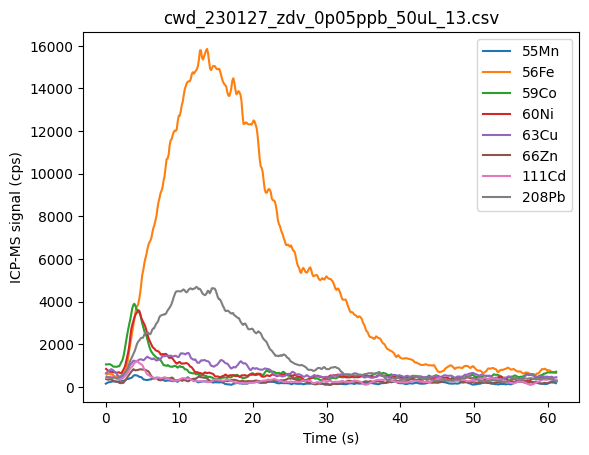

cwd_230127_zdv_0p05ppb_50uL_15.csv
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number

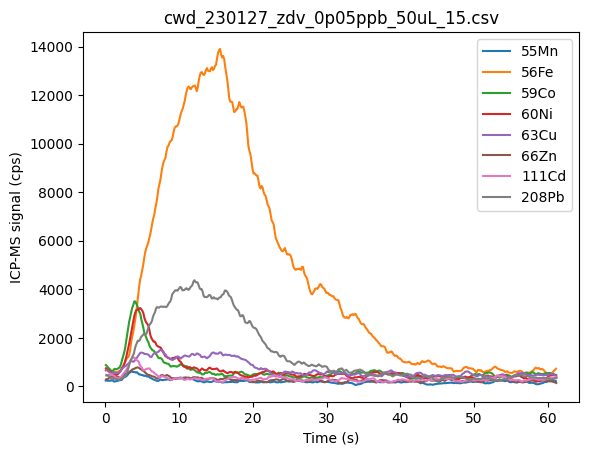

cwd_230127_zdv_0p05ppb_50uL_14.csv
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number

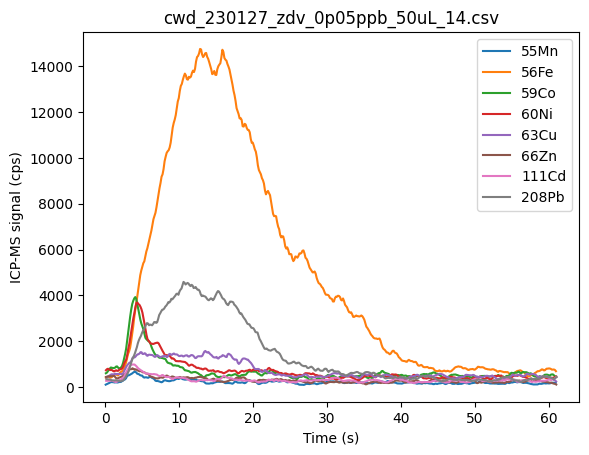

cwd_230127_zdv_0p05ppb_50uL_16.csv
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number

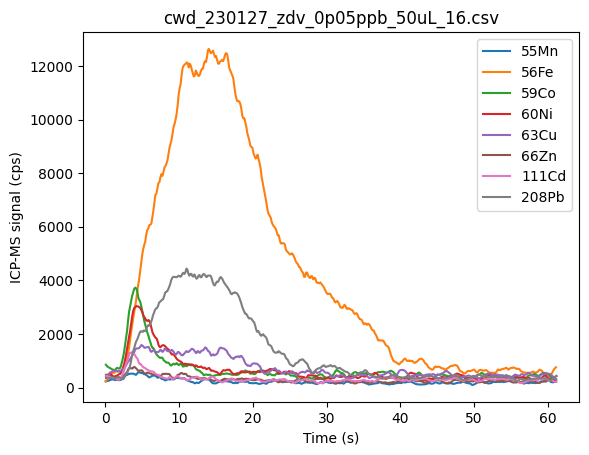

cwd_230127_zdv_0p05ppb_50uL_17.csv
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number

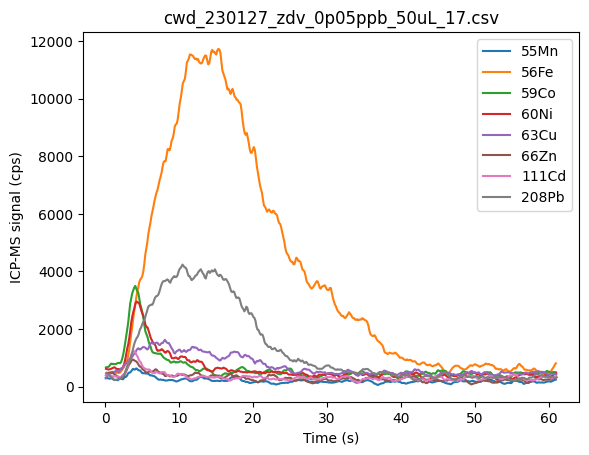

cwd_230127_zdv_0p05ppb_50uL_19.csv
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number

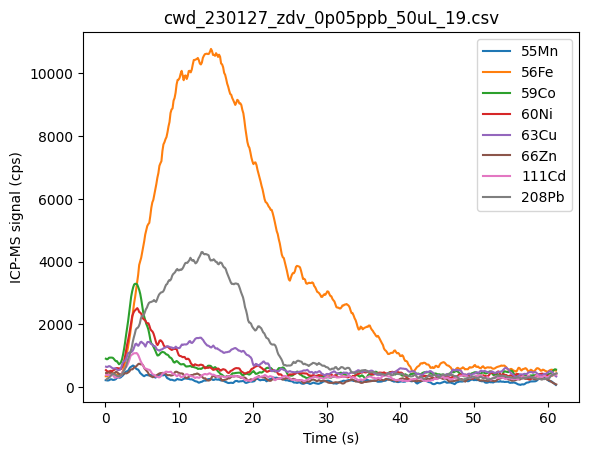

cwd_230127_zdv_0p05ppb_50uL_18.csv
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number

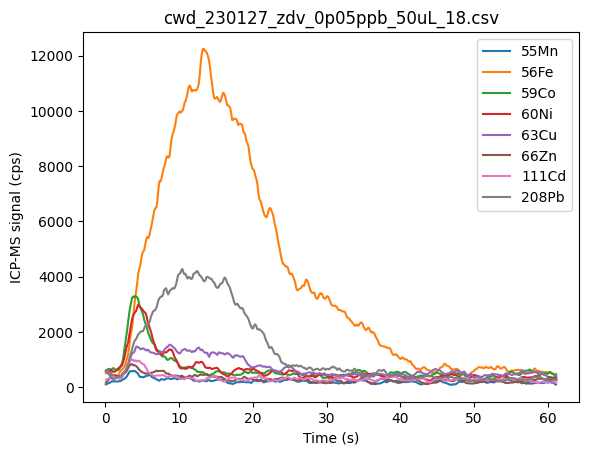

cwd_230127_zdv_0p05ppb_50uL_20.csv
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')
Index(['Number

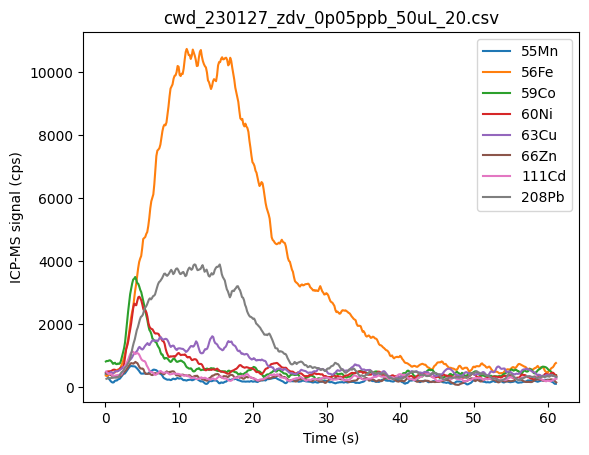

55Mn 13324.344659519764 395.71651620876884 2.969876015073234
56Fe 254370.47884793405 34590.593714826085 13.598509493511152
59Co 40350.357996072824 1978.5023752876345 4.903308108146639
60Ni 39473.53971702895 2416.0416491294764 6.120661249153676
63Cu 43818.97864870816 530.9783560674896 1.2117542956084932
66Zn 17929.661804765237 544.5575222806758 3.0371879191605644
111Cd 20351.227148395046 424.19682580416134 2.0843795939726153
208Pb 81400.2206978822 3556.1201997052112 4.3686861893210205


In [49]:
metals = ['55Mn', '56Fe', '59Co','60Ni','63Cu','66Zn','111Cd', '208Pb']

blanks = {me:{'areas':[],'mean': None,'std':None} for me in metals}

r = 0

for f in flist:
    
    if '0p05ppb' in f:
        print(f)
        r = r + 1 
        fig, ax = plt.subplots()
        for metal in metals:
            if f == 'cwd_230127_zdv_nitric_50uL_11.csv':
                df = pd.read_csv(f,sep=',',header=0)
            else:
                df = pd.read_csv(f,sep=';',header=1)
            print(df.columns)
            t = 'Time ' + metal
            df = df[[t,metal]]
            #df = df[df[t]>60*0.66]
            area = getPeakArea(df)

            blanks[metal]['areas'].append(area)

            ax.plot(df[t],df[metal],label = metal)
#plt.ylim(0,6e6)
        ax.set_ylabel('ICP-MS signal (cps)')
        ax.set_xlabel('Time (s)')
        plt.legend()
        plt.title(f)
        plt.show()

for me in metals:

    blanks[me]['mean'] = np.mean(blanks[me]['areas'])
    blanks[me]['std'] = np.std(blanks[me]['areas'])

for me in metals:

    print(me, blanks[me]['mean'], blanks[me]['std'],  blanks[me]['std'] /  blanks[me]['mean'] * 100 )


In [56]:
metals = ['55Mn', '56Fe', '59Co','60Ni','63Cu','66Zn','111Cd', '208Pb']
mwl = [55,56,59,60,63,66,111,208]
cl = ['C0', 'C1','C2','C3','C4','C5','C6','C7']
cols = {me:c for me, c in zip(metals,cl)}


mws = {me:mw for me, mw in zip(metals,mwl)}
samples = {me:{'areas':[],'mean': None,'std':None} for me in metals}



#for f in flist:
for metal in metals:
  #  fig, ax = plt.subplots()

    for f in flist:
    
    #for metal in metals:

        if '2p5ppb' in f:
    
            df = pd.read_csv(f,sep=',',header=0)
            t = 'Time ' + metal
            df = df[[t,metal]]
            #df = df[df[t]>60*0.66]
            area = getPeakArea(df)

            samples[metal]['areas'].append(area)

  #         ax.plot(df[t],df[metal],color=cols[metal], label = metal,linewidth = 0.75)

  #          for f in flist:

  #              if 'nitric' in f:
                   # r = r + 1 

  #                      dfb = pd.read_csv(f,sep=';',header=1)
  #                      t = 'Time ' + metal
  #                      dfb = dfb[[t,metal]]
                        #df = df[df[t]>60*0.66]

  #                      ax.plot(dfb[t],dfb[metal],color=cols[metal],linestyle = '--')
  #                      ax.ticklabel_format(axis='y', style='sci')
            #plt.ylim(0,6e6)
  #  h, l = ax.get_legend_handles_labels()
    
  #  ax.set_ylabel('ICP-MS signal (cps)')
  #  ax.set_xlabel('Time (s)')
  #  plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    #plt.legend(h[:1],l[:1])
  #  plt.title(metal)
  #  plt.show()

        
    
            
    #plt.legend(h[:8],l[:8])

for me in metals:

    samples[me]['mean'] = np.mean(samples[me]['areas'])
    samples[me]['std'] = np.std(samples[me]['areas'])
    samples[me]['rmse'] = np.std(samples[me]['areas'])

for me in metals:
    print('\n%s\nmean sample area: %.2f\nblank-subtracted area: %.2f\nstandard deviation of sample area: %.2f\nLOD (nM): %.3f' %(me, samples[me]['mean'], samples[me]['mean'] - blanks[me]['mean'], samples[me]['std'],samples[me]['std']*2.306/(samples[me]['mean'] - blanks[me]['mean'])*1000/mws[me]))
   # print(me, samples[me]['mean'], samples[me]['mean'] - blanks[me]['mean'], samples[me]['std'])
   # print(me,samples[me]['std']*2.571/(samples[me]['mean'] - blanks[me]['mean'])*1000/mws[me])


55Mn
mean sample area: 64837.14
blank-subtracted area: 51512.80
standard deviation of sample area: 939.50
LOD (nM): 0.765

56Fe
mean sample area: nan
blank-subtracted area: nan
standard deviation of sample area: nan
LOD (nM): nan

59Co
mean sample area: 235356.85
blank-subtracted area: 195006.50
standard deviation of sample area: 2279.93
LOD (nM): 0.457

60Ni
mean sample area: 94024.53
blank-subtracted area: 54550.99
standard deviation of sample area: 1444.63
LOD (nM): 1.018

63Cu
mean sample area: 233441.34
blank-subtracted area: 189622.37
standard deviation of sample area: 3027.32
LOD (nM): 0.584

66Zn
mean sample area: 37140.10
blank-subtracted area: 19210.44
standard deviation of sample area: 831.37
LOD (nM): 1.512

111Cd
mean sample area: 67518.06
blank-subtracted area: 47166.83
standard deviation of sample area: 863.16
LOD (nM): 0.380

208Pb
mean sample area: 1714775.26
blank-subtracted area: 1633375.04
standard deviation of sample area: 16348.91
LOD (nM): 0.111


55
56
59
60
63
66
111
208


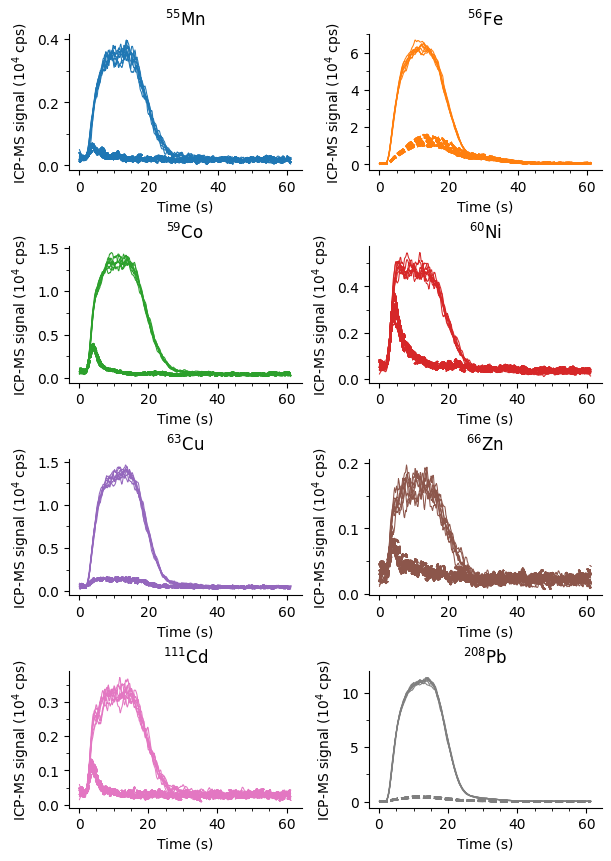

In [55]:
### LOD FIGURE (FIGURE S4)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(6., 8.5),  layout="constrained")
metals = ['55Mn', '56Fe', '59Co','60Ni','63Cu','66Zn','111Cd', '208Pb']
mwl = [55,56,59,60,63,66,111,208]
cl = ['C0', 'C1','C2','C3','C4','C5','C6','C7']
cols = {me:c for me, c in zip(metals,cl)}

#for f in flist:
row = 0
col = 0

for metal in metals:
    for f in flist:
    
    #for metal in metals:

        if '2p5ppb' in f:
            ax = axs[row,col]
            df = pd.read_csv(f,sep=',',header=0)
            t = 'Time ' + metal
            df = df[[t,metal]]

            ax.plot(df[t],df[metal]/1e4,color=cols[metal], label = metal,linewidth = 0.75)

            for f in flist:

                if '0p05' in f:
                   # r = r + 1 

                       # if f == 'cwd_230127_zdv_nitric_50uL_11.csv':
                        dfb = pd.read_csv(f,sep=';',header=1)
    
                        t = 'Time ' + metal
                        dfb = dfb[[t,metal]]
                        #df = df[df[t]>60*0.66]

                        ax.plot(dfb[t],dfb[metal]/1e4,color=cols[metal],linestyle = '--')
                        #ax.ticklabel_format(axis='y', style='sci')
            #plt.ylim(0,6e6)


    h, l = ax.get_legend_handles_labels()

    if col == 1:
        row = row + 1 

    if col == 0:
        col = 1
    else:
        col = 0 

    #samples[me]['std'] = np.std(samples[me]['areas'])
    
    #ax.text(0.95, 0.95, 'mean standard area (counts): %.2e' %(samples[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    #ax.text(0.95, 0.90, 'mean blank area (counts): %.2e' %(blanks[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)

    ax.set_ylabel('ICP-MS signal ($10^4$ cps)')
    ax.set_xlabel('Time (s)')
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    #plt.legend(h[:1],l[:1])

    tit = re.split('(\d+)', metal)
    an = tit[1]

    print(an)
    el = tit[2]
    strtit = '$^{%s}$%s' %(an,el)
    ax.set_title(strtit)
    sns.despine()
plt.show()


In [ ]:
## CAL CURVE FIGURE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

calfile = '/Users/christiandewey/Library/CloudStorage/GoogleDrive-christian.w.dewey@gmail.com/Other computers/My MacBook Pro/manuscripts/in-progress/LC-ICPMS/data/python/column-test/c18/std-c18-phenyl/calibration_areas.txt'

df = pd.read_csv(calfile)
df['ppb']=[0,25,50,100,200]

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(6., 8.5)) #,  layout="constrained")

#for f in flist:
row = 0
col = 0

for metal in metals:
    ax = axs[row,col]
    print(int(max(df[metal])))
    ax.scatter(df[metal]/1e4,df['ppb'],color=cols[metal], label = metal,linewidth = 0.75)

    h, l = ax.get_legend_handles_labels()

    X = np.array([df[metal]]).reshape((-1, 1))
    y = np.array(df['ppb'])
    
    model = LinearRegression().fit(X, y)

    Xpred = np.array(range(0,int(max(df[metal])))).reshape(-1,1)
    ypred = model.predict(X)
    rmse = mean_squared_error(y, ypred)
    print(rmse, np.sqrt(rmse))
    Xpred = X
    ax.plot(Xpred/1e4,ypred,color=cols[metal], linestyle = '--')

    ax.text( 0.05, 0.95, 'RMSE: %.2f' %(rmse),horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    
    if col == 1:
        row = row + 1 

    if col == 0:
        col = 1
    else:
        col = 0 

    #samples[me]['std'] = np.std(samples[me]['areas'])
    
    #ax.text(0.95, 0.95, 'mean standard area (counts): %.2e' %(samples[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    #ax.text(0.95, 0.90, 'mean blank area (counts): %.2e' %(blanks[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)

    ax.set_ylabel('Concentration (ppb)')
    ax.set_xlabel('Peak area ($10^4$ Counts)')
    ax.yaxis.set_minor_locator(MultipleLocator(25))
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
    #plt.legend(h[:1],l[:1])
    
    tit = re.split('(\d+)', metal)
    an = tit[1]

    print(an)
    el = tit[2]
    strtit = '$^{%s}$%s' %(an,el)
    ax.set_title(strtit)
    sns.despine()

plt.tight_layout(pad=0.5, w_pad=2.5, h_pad=2)
plt.show()

In [ ]:
#for f in flist:


for metal in metals:
    fig, ax = plt.subplots()

    for f in flist:
    
    #for metal in metals:

        if '25ppb' in f:
    
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]

            ax.plot(df[t],df[metal],color=cols[metal], label = metal,linewidth = 0.75)

            for f in flist:

                if 'nitric' in f:
                   # r = r + 1 

                        dfb = pd.read_csv(f,sep=';',header=1)
                        t = 'Time ' + metal
                        dfb = dfb[[t,metal]]
                        #df = df[df[t]>60*0.66]

                        ax.plot(dfb[t],dfb[metal],color=cols[metal],linestyle = '--')
                        ax.ticklabel_format(axis='y', style='sci')
            #plt.ylim(0,6e6)
    h, l = ax.get_legend_handles_labels()

    #samples[me]['std'] = np.std(samples[me]['areas'])
    
    #ax.text(0.95, 0.95, 'mean standard area (counts): %.2e' %(samples[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    #ax.text(0.95, 0.90, 'mean blank area (counts): %.2e' %(blanks[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)

    ax.set_ylabel('ICP-MS signal (cps)')
    ax.set_xlabel('Time (s)')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    #plt.legend(h[:1],l[:1])
    plt.title(metal)
    plt.show()


In [ ]:

fig, ax = plt.subplots()

for f in flist:
    
    if '50ppb' in f:
    
        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            df = df[df[t]>45]
            area = getPeakArea(df)

            ax.plot(df[t],df[metal])
plt.title('50ppb')
###plt.ylim(0,6e6)
plt.show()




fig, ax = plt.subplots()

for f in flist:
    
    if '200ppb' in f:
    
        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            df = df[df[t]>50]
            area = getPeakArea(df)
            if metal == '56Fe':
                ax.plot(df[t],df[metal])
plt.title('200ppb')
#plt.ylim(0,6e6)
plt.show()

In [ ]:
factors = {f:None for f in flist if '.csv' in f}

for f in flist:
    
    if '.csv' in f:

        metal = '115In'
        
        df = pd.read_csv(f,sep=';',header=1)

        t = 'Time ' + metal
        df = df[[t,metal]]
        area = getPeakArea(df)
        factors[f] = area / 16000

factors

In [ ]:
stats = {metal:{'av': None,'std': None,'rmse': None,'counts': [],'cps': [],'files': []} for metal in metals}

for f in flist:
    
    if '.csv' in f:

        cf = factors[f]

        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            area = getPeakArea(df) / cf

            stats[metal]['counts'].append(area)
            stats[metal]['cps'].append(area/30)
            stats[metal]['files'].append(f)

for me in metals:

    stats[me]['std'] = np.std(stats[me]['counts'])
    stats[me]['av'] = np.mean(stats[me]['counts'])

stats

In [ ]:
metals = ['55Mn', '59Co','60Ni','66Zn','111Cd','208Pb','63Cu', '56Fe', '115In']

c25ppb = {metal:[] for metal in metals}
c50ppb = {metal:[] for metal in metals}
c100ppb = {metal:[] for metal in metals}
c200ppb = {metal:[] for metal in metals}

for f in flist:
    
    if '.csv' in f:

        cf = factors[f]

        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            area = getPeakArea(df) / cf

            if '50ppb' in f:
                c50ppb[metal].append(area)
            
            elif '25ppb' in f:
                c25ppb[metal].append(area)


            elif '200ppb' in f:
                c100ppb[metal].append(area)  #'200ppb' files are mislableled

In [ ]:

for me in metals:
    print('\n',me)
    #print(c25ppb[me])
    print(c50ppb[me])
    print(c100ppb[me])

    for i,j in zip(c200ppb[me], c50ppb[me]):
        print(i / j)


In [ ]:
holder = pd.DataFrame(index=[25, 50, 100], columns = metals)

for c, d in zip([25, 50, 100],[c25ppb,c50ppb,c100ppb]):
    pddf = pd.DataFrame(d)
    holder.loc[c] = pddf.std()

print(holder)


for me in metals:
    fig, ax = plt.subplots()

    ax.scatter(holder.index, holder[me])
    plt.title(me)
    plt.show()

In [ ]:

#icpms_file = '/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/Keck iCAP Q/2022/2022-09/Tillamook, Sept 2022/spring_ENV.csv'

icpms = pd.read_csv(icpms_file, sep=';',header=1)

print(icpms.columns)

metals = ['55Mn', '59Co','60Ni','66Zn','111Cd','208Pb','63Cu', '56Fe']

#pdf = PdfPages('/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/eics_cu_100mz_fullmz-dec13.pdf')

fig, ax = plt.subplots()
for me in metals:
    me_key = 'Time %s' %me

    x = icpms[me_key]/60
    inds = np.asarray((x>=14) & (x<=16))

    x_sub = x[inds]

    y = icpms[me]
    y_sub = y[inds]
          

    x_sub = np.asarray(x_sub).reshape((-1, 1))


    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_sub, y_sub)

    # Make predictions using the testing set
    pred = regr.predict(x_sub)
    rmse=np.sqrt(mean_squared_error(y_sub, pred))
    # The mean squared error
    print(me)
    print("Root mean squared error: %.2f" % rmse)
    # The coefficient of determination: 1 is perfect prediction
    print("3 X RMSE: %.2f" % (3*rmse))

    #ax.plot(icpms[me_key]/60, icpms[me]/1000, label=me)        
    ax.plot(x_sub, y_sub, label=me) 
    ax.plot(x_sub,pred,color='black')       
    maxicp = max(maxicp,max(icpms[me].values))


ax.set_ylim(0,maxicp*1.1)
ax.set_title('ICP-MS Traces (Spring Sample)')
ax.set_xlabel('Time (min)')
ax.set_ylabel('ICP-MS signal (1000 cps)')
ax.legend(bbox_to_anchor=(1.05,0.5),loc='center left',frameon =False)
ax.set_xlim(13.5,16.5)
ax.set_ylim(0,0.1e4)
fig.tight_layout()
plt.show()


Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')


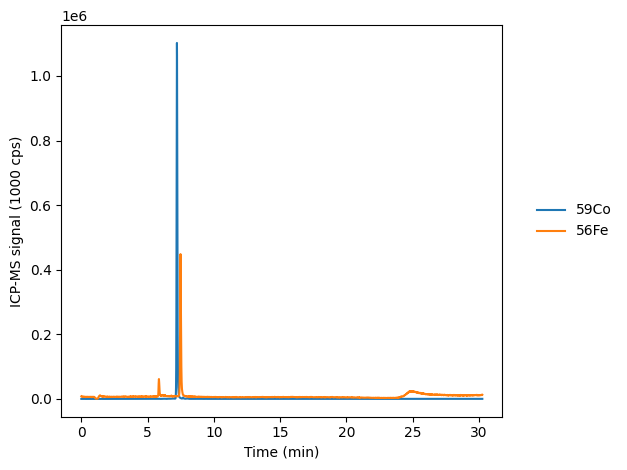

Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')


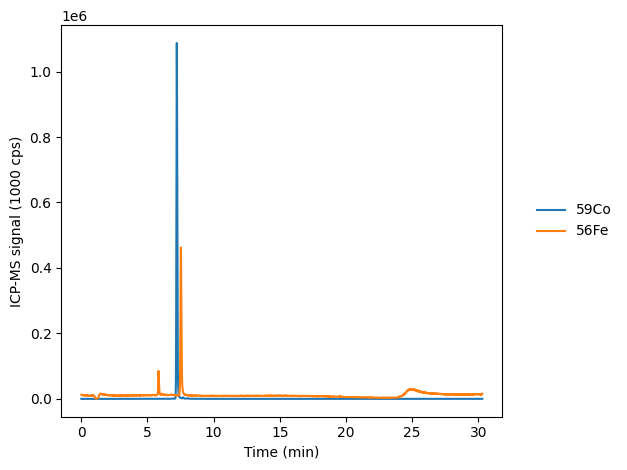

Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')


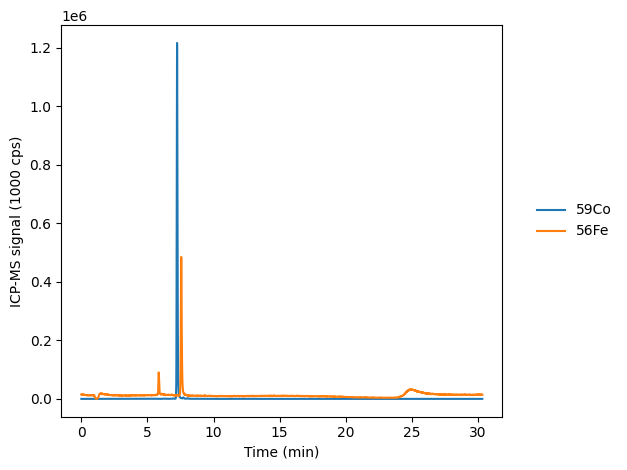

Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')


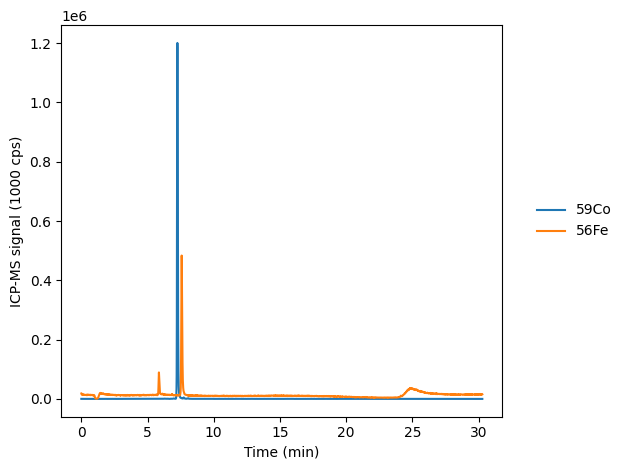

Index(['Number', 'Time 55Mn', '55Mn', 'Time 59Co', '59Co', 'Time 60Ni', '60Ni',
       'Time 63Cu', '63Cu', 'Time 66Zn', '66Zn', 'Time 111Cd', '111Cd',
       'Time 27Al', '27Al', 'Time 127I', '127I', 'Time 208Pb', '208Pb',
       'Time 115In', '115In', 'Time 31P', '31P', 'Time 56Fe', '56Fe'],
      dtype='object')


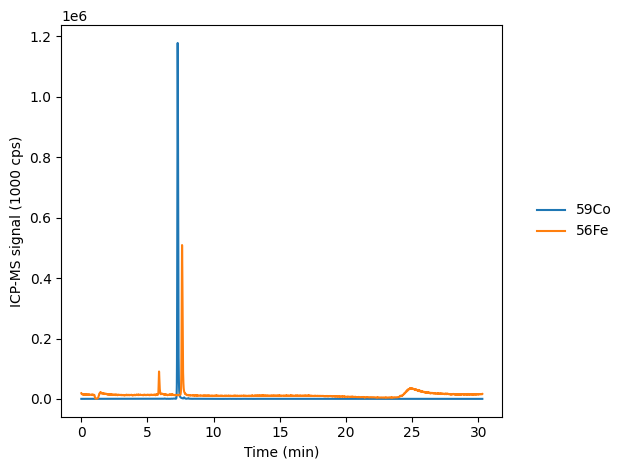

In [64]:
dir = '/Volumes/Samsung_T5/Keck iCAP/2023/January/30Jan/'

flist = os.listdir(dir)

for f in flist:

    if ('.csv' in f) and ('stdmix' in f) and ('nocomp' not in f) and ('zdv' not in f):

        icpms = pd.read_csv(dir +f, sep=';',header=1)

        print(icpms.columns)

        metals = [ '59Co', '56Fe']


        fig, ax = plt.subplots()
        for me in metals:
            me_key = 'Time %s' %me

            x = icpms[me_key]/60
            y = icpms[me]
    
            ax.plot(x, y, label=me) 
        ax.set_xlabel('Time (min)')
        ax.set_ylabel('ICP-MS signal (1000 cps)')
        ax.legend(bbox_to_anchor=(1.05,0.5),loc='center left',frameon =False)
        fig.tight_layout()
        plt.show()